# <div align="center"> AIRLINE PASSENGER SATISFACTION </div>

## Import Library

In [209]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 200)

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

## Read Dataset

In [8]:
#read dataset
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [10]:
#display details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [12]:
#drop 'Unnamed: 0' column because is not necesary
df.drop(['Unnamed: 0'],axis=1)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [14]:
#display the shape of the data
df.shape

(103904, 25)

In [98]:
#describe the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


In [16]:
#check for any null values
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [18]:
((df.shape[0] - df.dropna().shape[0]) / df.shape[0]) * 100

0.29835232522328303

In [20]:
#check missing values
def getmissing(df):
    values = {}
    for feat in df.columns:
        if df[feat].isna().any():
            values[feat] = round(df[feat].mean(),2)
    return values

In [22]:
values = getmissing(df)

In [24]:
values

{'Arrival Delay in Minutes': 15.18}

In [26]:
#fill missing value with median 
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(),inplace=True)

In [28]:
#checking duplicated data
df.duplicated().sum()

0

In [30]:
#drop 'Unnamed: 0' column and id colums because is not necesary
df1 = df.drop(columns = ['Unnamed: 0','id'])

In [32]:
df1.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


## Data Understanding 

In [34]:
categorical = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
numerical = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location',
              'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service',
              'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 
              'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [36]:
#show statistic of numerical column
df1[numerical].describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [38]:
#show statistical summary for categorical column
df1[categorical].describe()

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [40]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [42]:
# Indicates the exact number of values
# this code is very useful because it has multiple categorical columns
for col in categorical:
    print (f'Value counts of {col} column')
    print(df[col].value_counts(), '\n')

Value counts of Gender column
Gender
Female    52727
Male      51177
Name: count, dtype: int64 

Value counts of Customer Type column
Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64 

Value counts of Type of Travel column
Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64 

Value counts of Class column
Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64 

Value counts of satisfaction column
satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64 



## Univariate Analysis :

### Numeric Column ###

### (1). Show Outliers with Boxplot ###

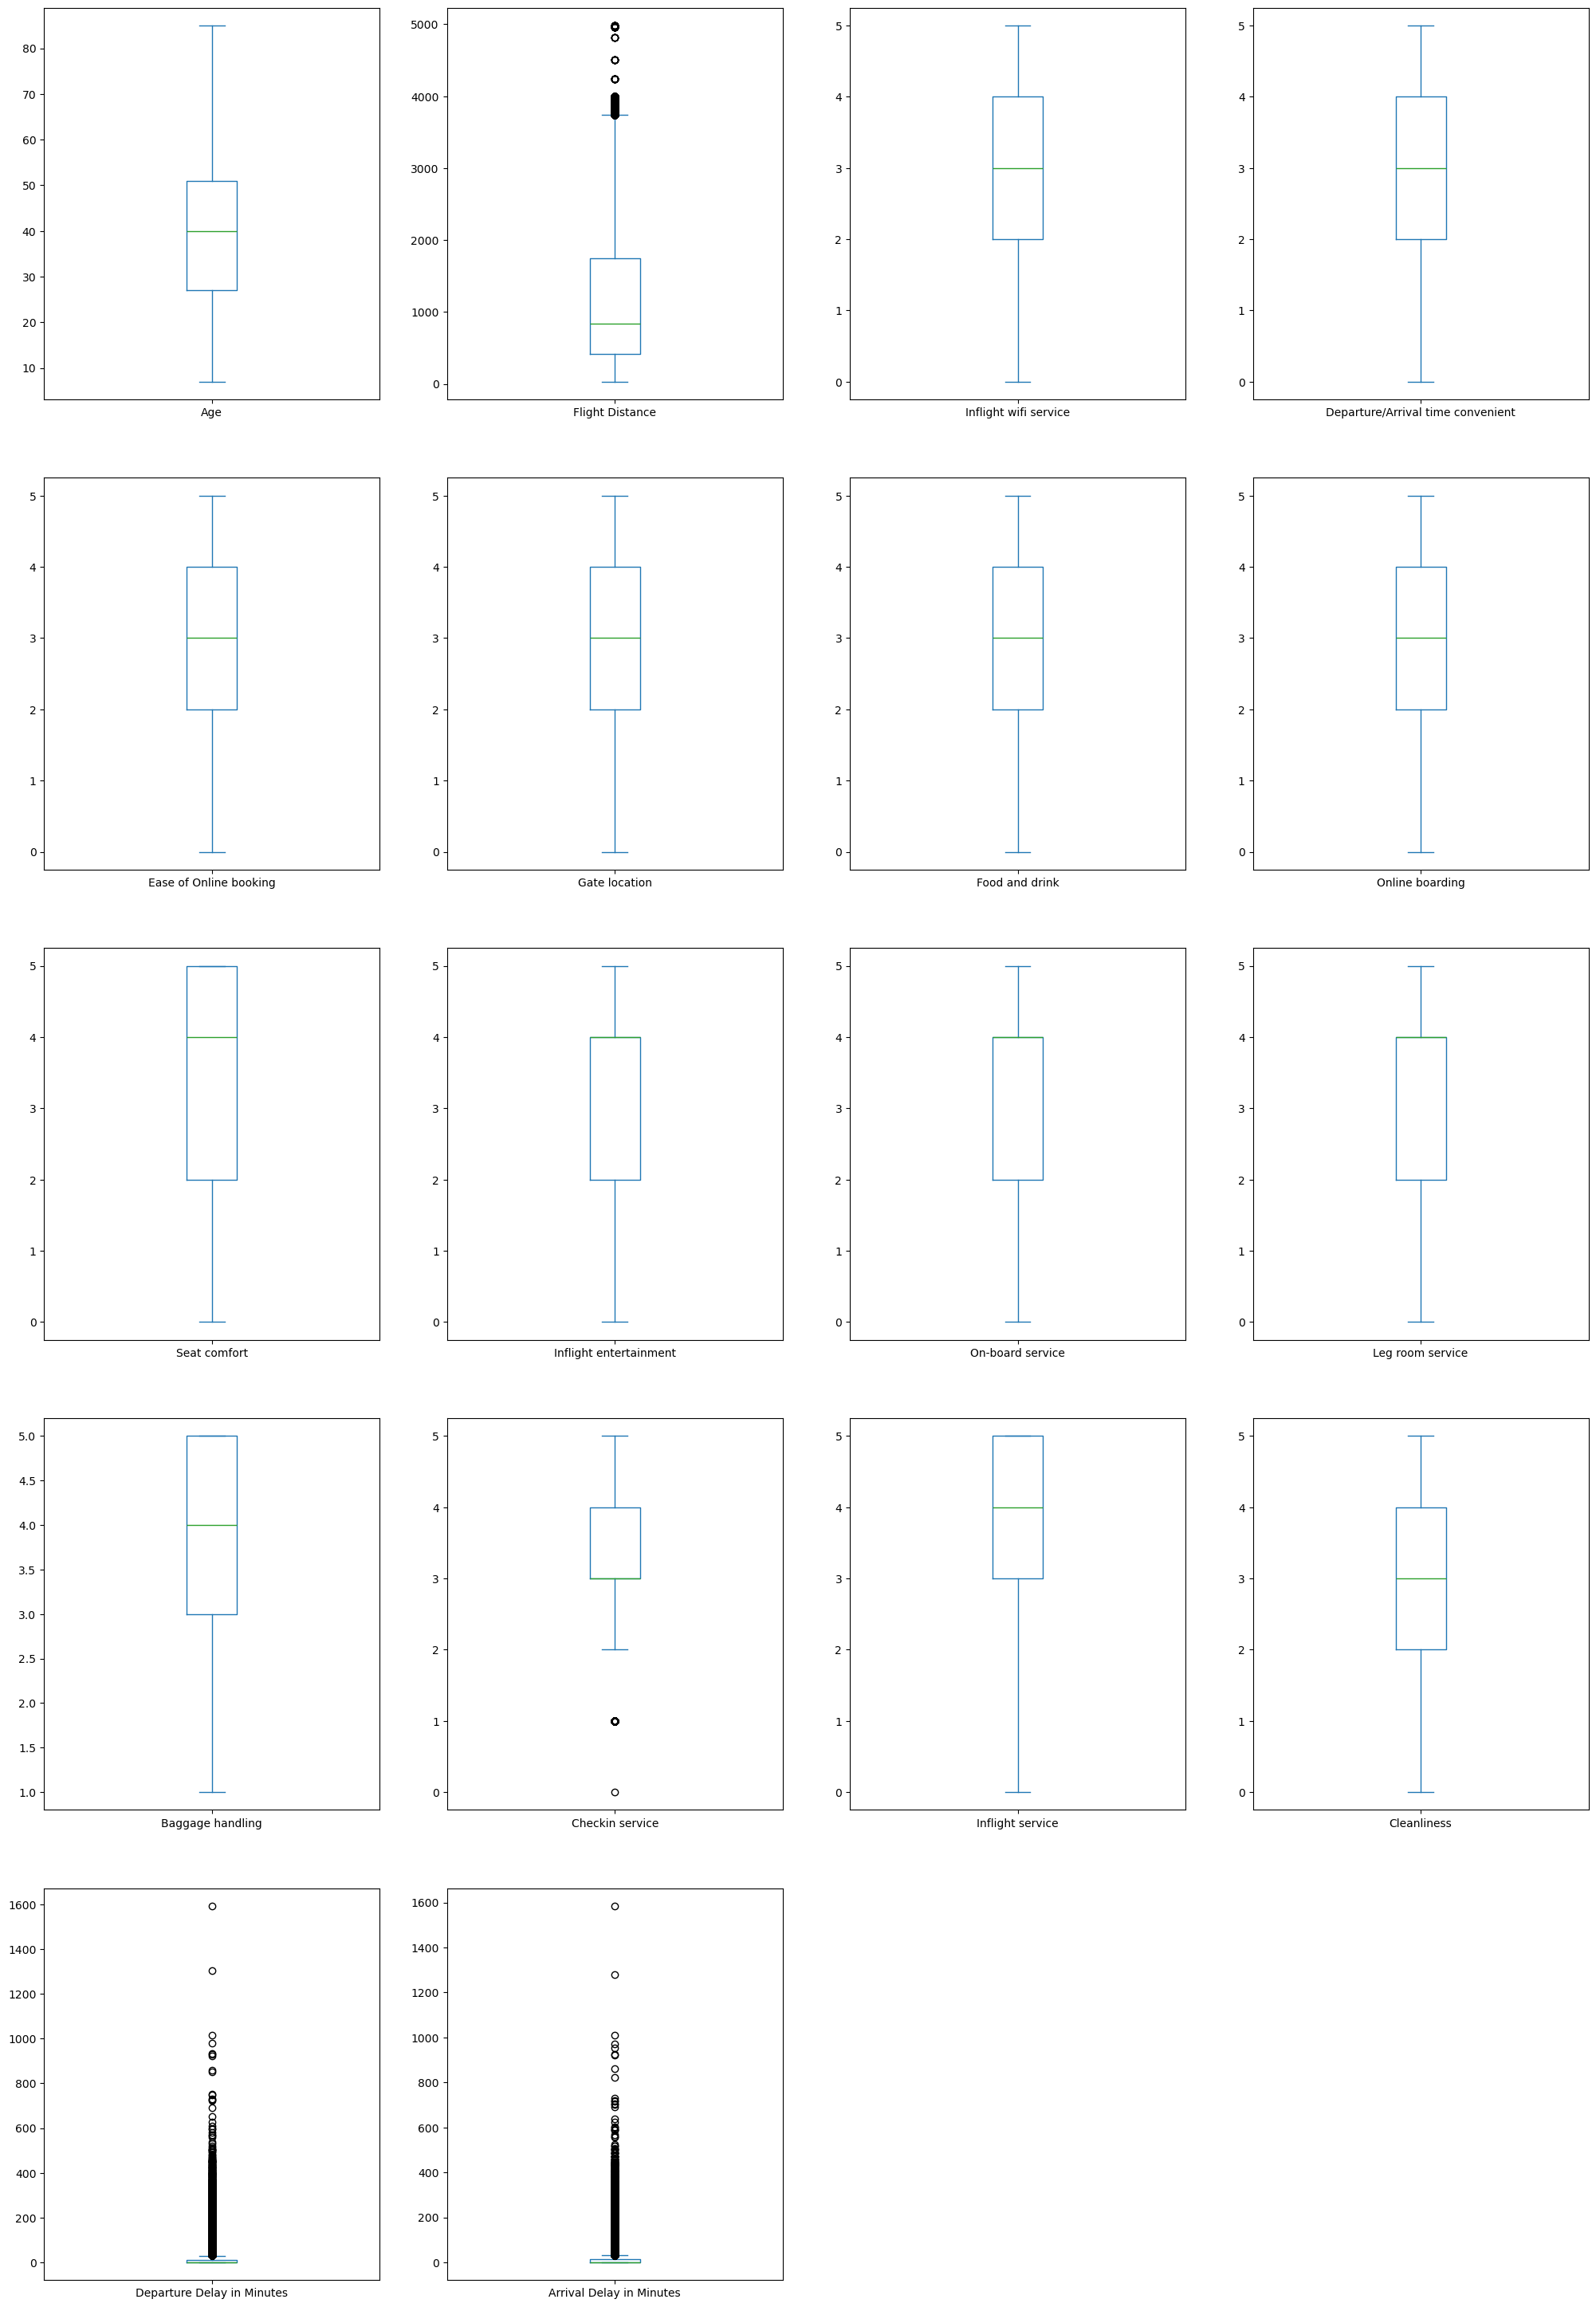

In [46]:
# Create the box plot with subplots and layout
df1.plot(kind='box', subplots=True, layout=(8, 4), figsize=(25, 60))

# Display the plot
plt.show()

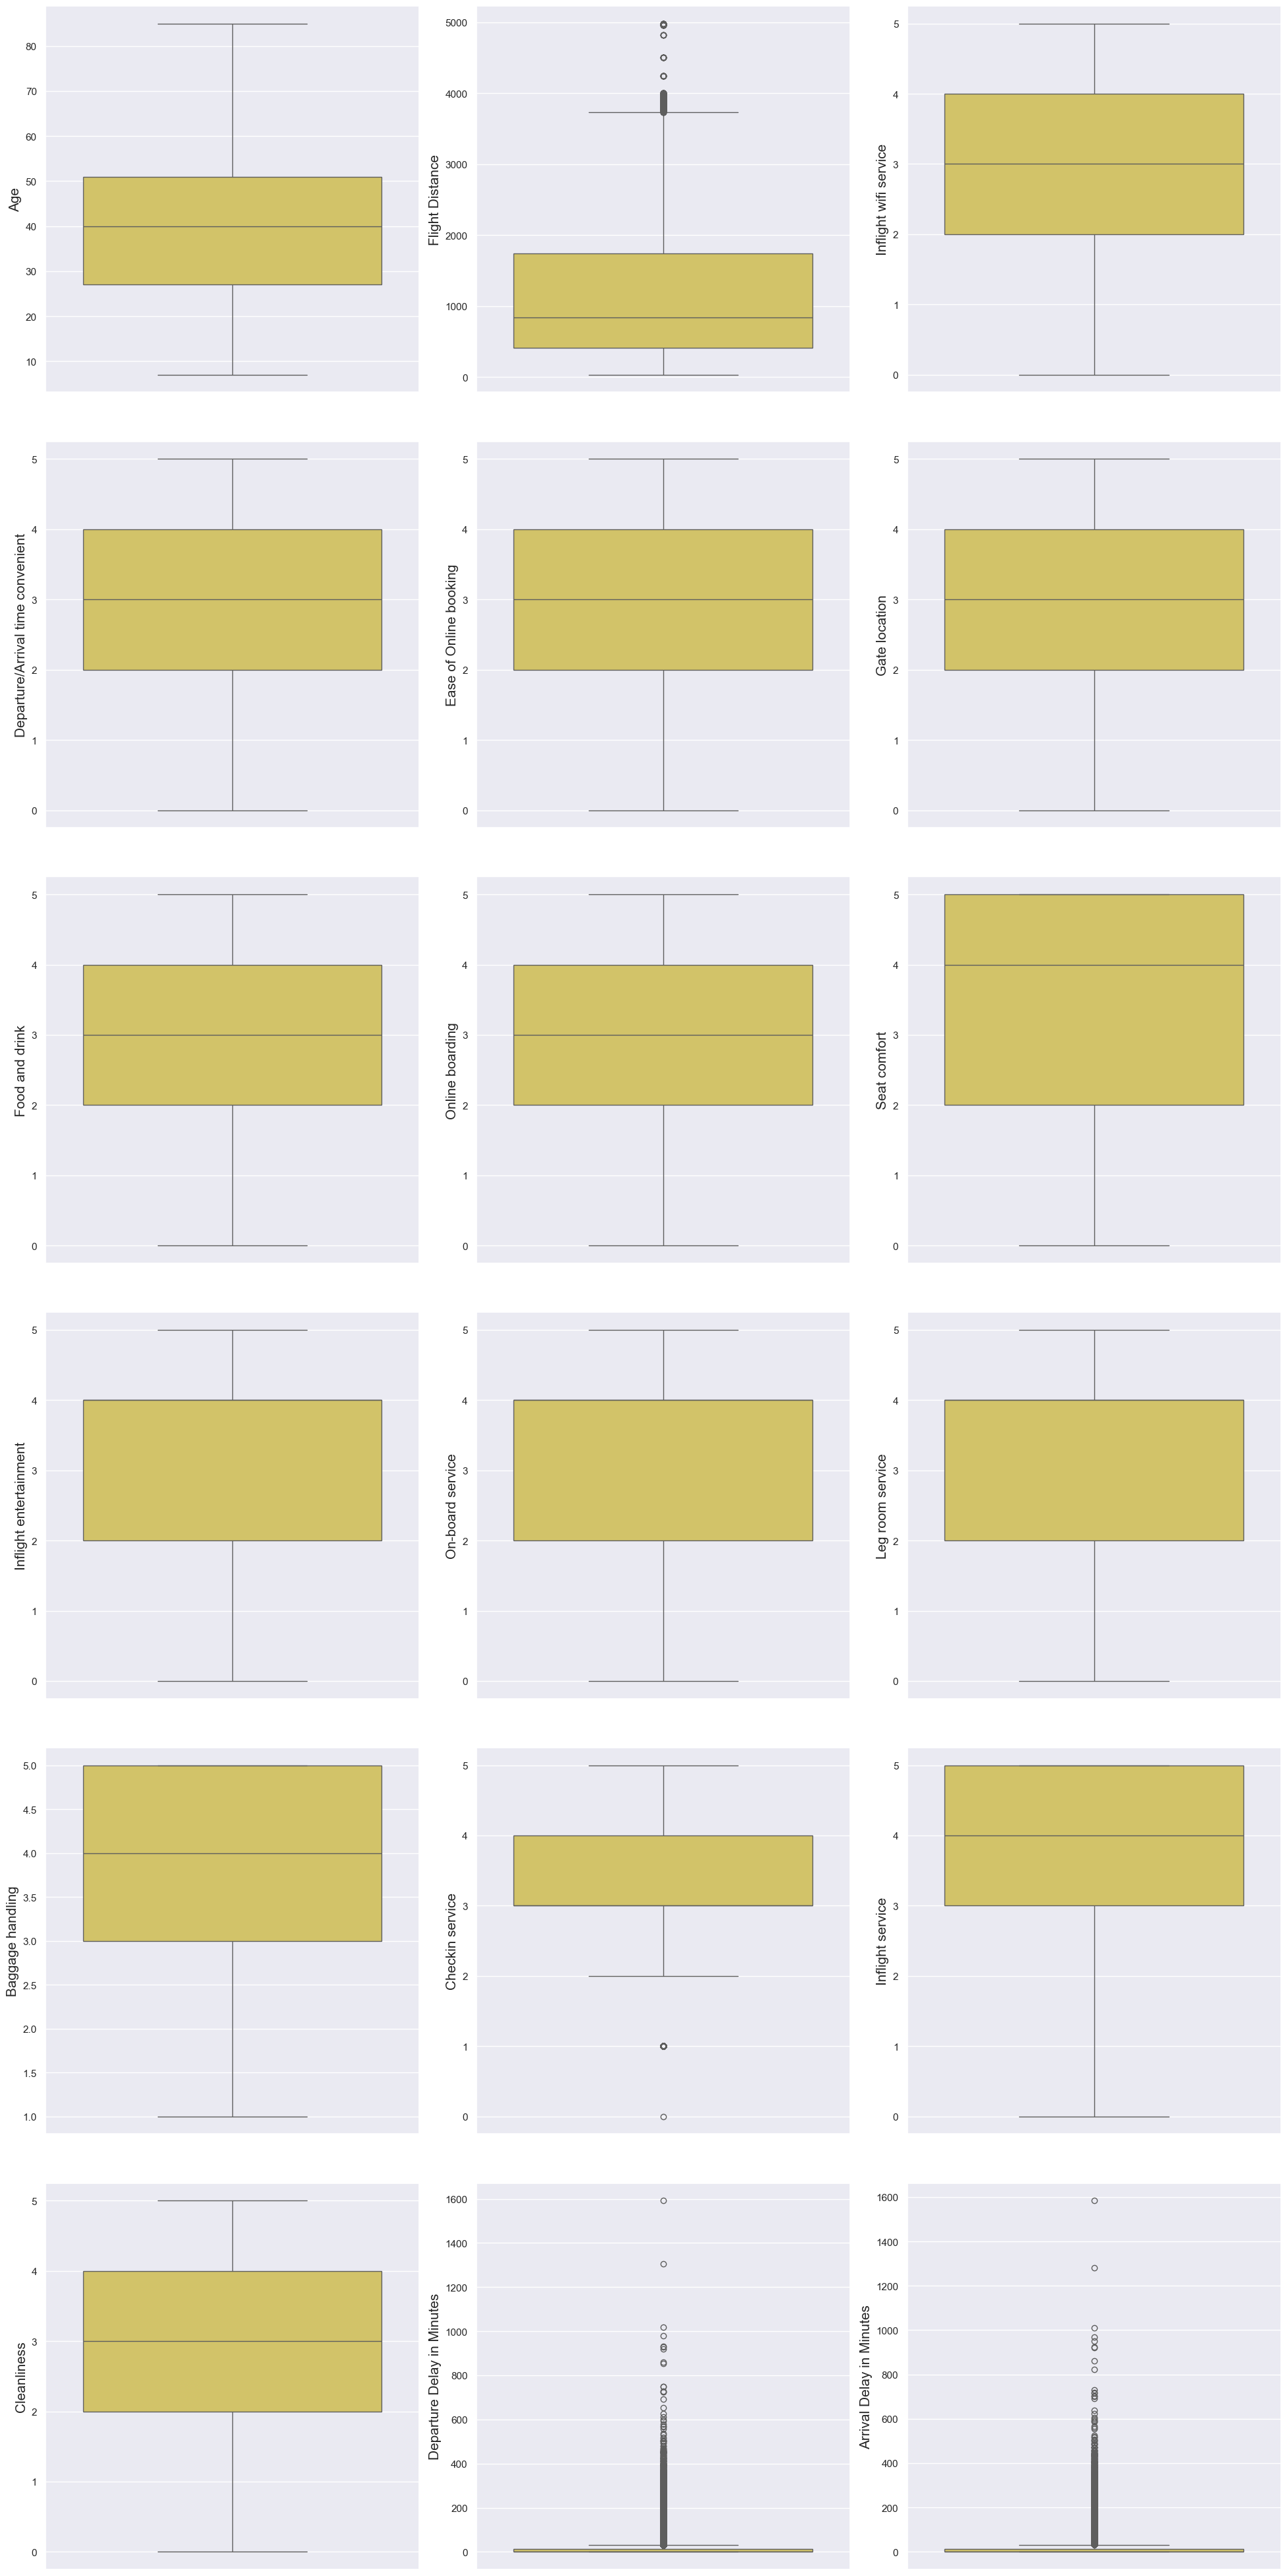

In [50]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )

fig, axs = plt.subplots(6, 3, figsize=(20,40))
fig.tight_layout(pad=3.0)

for f,ax in zip(numerical,axs.ravel()):
    sns.set(font_scale = 2)
    ax=sns.boxplot(ax=ax,data=df1,y=df1[f],color='#E3CF57')

In [192]:
# show the profile of outlier 1
outlier1 = df1['Flight Distance'].max()

df1[df1['Flight Distance'] == outlier1]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
2847,Female,Loyal Customer,63,Personal Travel,Business,4983,0,5,0,2,0,5,1,3,2,4,3,1,5,1,3,0.0,satisfied
18434,Female,Loyal Customer,31,Business travel,Eco,4983,4,3,3,3,4,4,4,3,2,5,2,4,1,4,18,0.0,satisfied
19755,Female,Loyal Customer,50,Business travel,Business,4983,5,4,5,5,5,1,5,3,2,4,3,5,5,5,0,0.0,satisfied
33094,Female,Loyal Customer,29,Personal Travel,Eco,4983,2,4,2,5,2,4,4,2,2,4,4,4,3,4,6,0.0,neutral or dissatisfied
46848,Male,Loyal Customer,42,Business travel,Business,4983,3,3,3,3,5,4,4,4,5,4,3,4,2,4,0,0.0,satisfied
64631,Female,Loyal Customer,52,Business travel,Business,4983,3,5,5,5,3,3,3,3,3,3,5,3,2,3,16,0.0,satisfied
64791,Female,Loyal Customer,50,Business travel,Business,4983,4,4,4,4,4,4,4,2,2,4,4,4,3,4,0,0.0,satisfied
67767,Male,Loyal Customer,67,Personal Travel,Eco Plus,4983,5,5,5,4,5,1,1,1,3,5,5,1,3,1,0,0.0,satisfied
74837,Female,Loyal Customer,37,Business travel,Business,4983,2,3,2,2,4,4,4,3,1,5,1,4,3,4,0,2.0,satisfied
79574,Male,Loyal Customer,38,Business travel,Eco Plus,4983,4,4,4,4,4,4,4,3,4,3,5,4,5,4,2,0.0,satisfied


In [204]:
# Show the profile of outlier 2
outlier2 = df1['Departure Delay in Minutes'].max()

df1[df1['Departure Delay in Minutes'] == outlier2]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
83741,Female,Loyal Customer,47,Personal Travel,Eco,1120,2,2,2,3,2,4,2,2,4,4,4,2,3,2,1592,1584.0,neutral or dissatisfied


In [200]:
# Show the profile of outlier 3
outlier3 = df1['Arrival Delay in Minutes'].max()

df1[df1['Arrival Delay in Minutes'] == outlier3]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
83741,Female,Loyal Customer,47,Personal Travel,Eco,1120,2,2,2,3,2,4,2,2,4,4,4,2,3,2,1592,1584.0,neutral or dissatisfied


In [206]:
# Show the profile of outlier 4
outlier4 = df1['Checkin service'].min()

df1[df1['Checkin service'] == outlier4]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
6580,Female,Loyal Customer,44,Business travel,Business,214,4,5,5,5,1,4,0,4,4,3,3,0,1,0,200,233.0,neutral or dissatisfied


In [208]:
df1['Checkin service'].unique()

array([4, 1, 3, 5, 2, 0], dtype=int64)

In [210]:
df1['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [68]:
#array of non continuos values
non_continues = ['Inflight wifi service', 'Departure/Arrival time convenient',
              'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding','Seat comfort', 'Inflight entertainment','On-board service',
              'Leg room service','Baggage handling', 'Checkin service','Inflight service','Cleanliness']
len(non_continues)

14

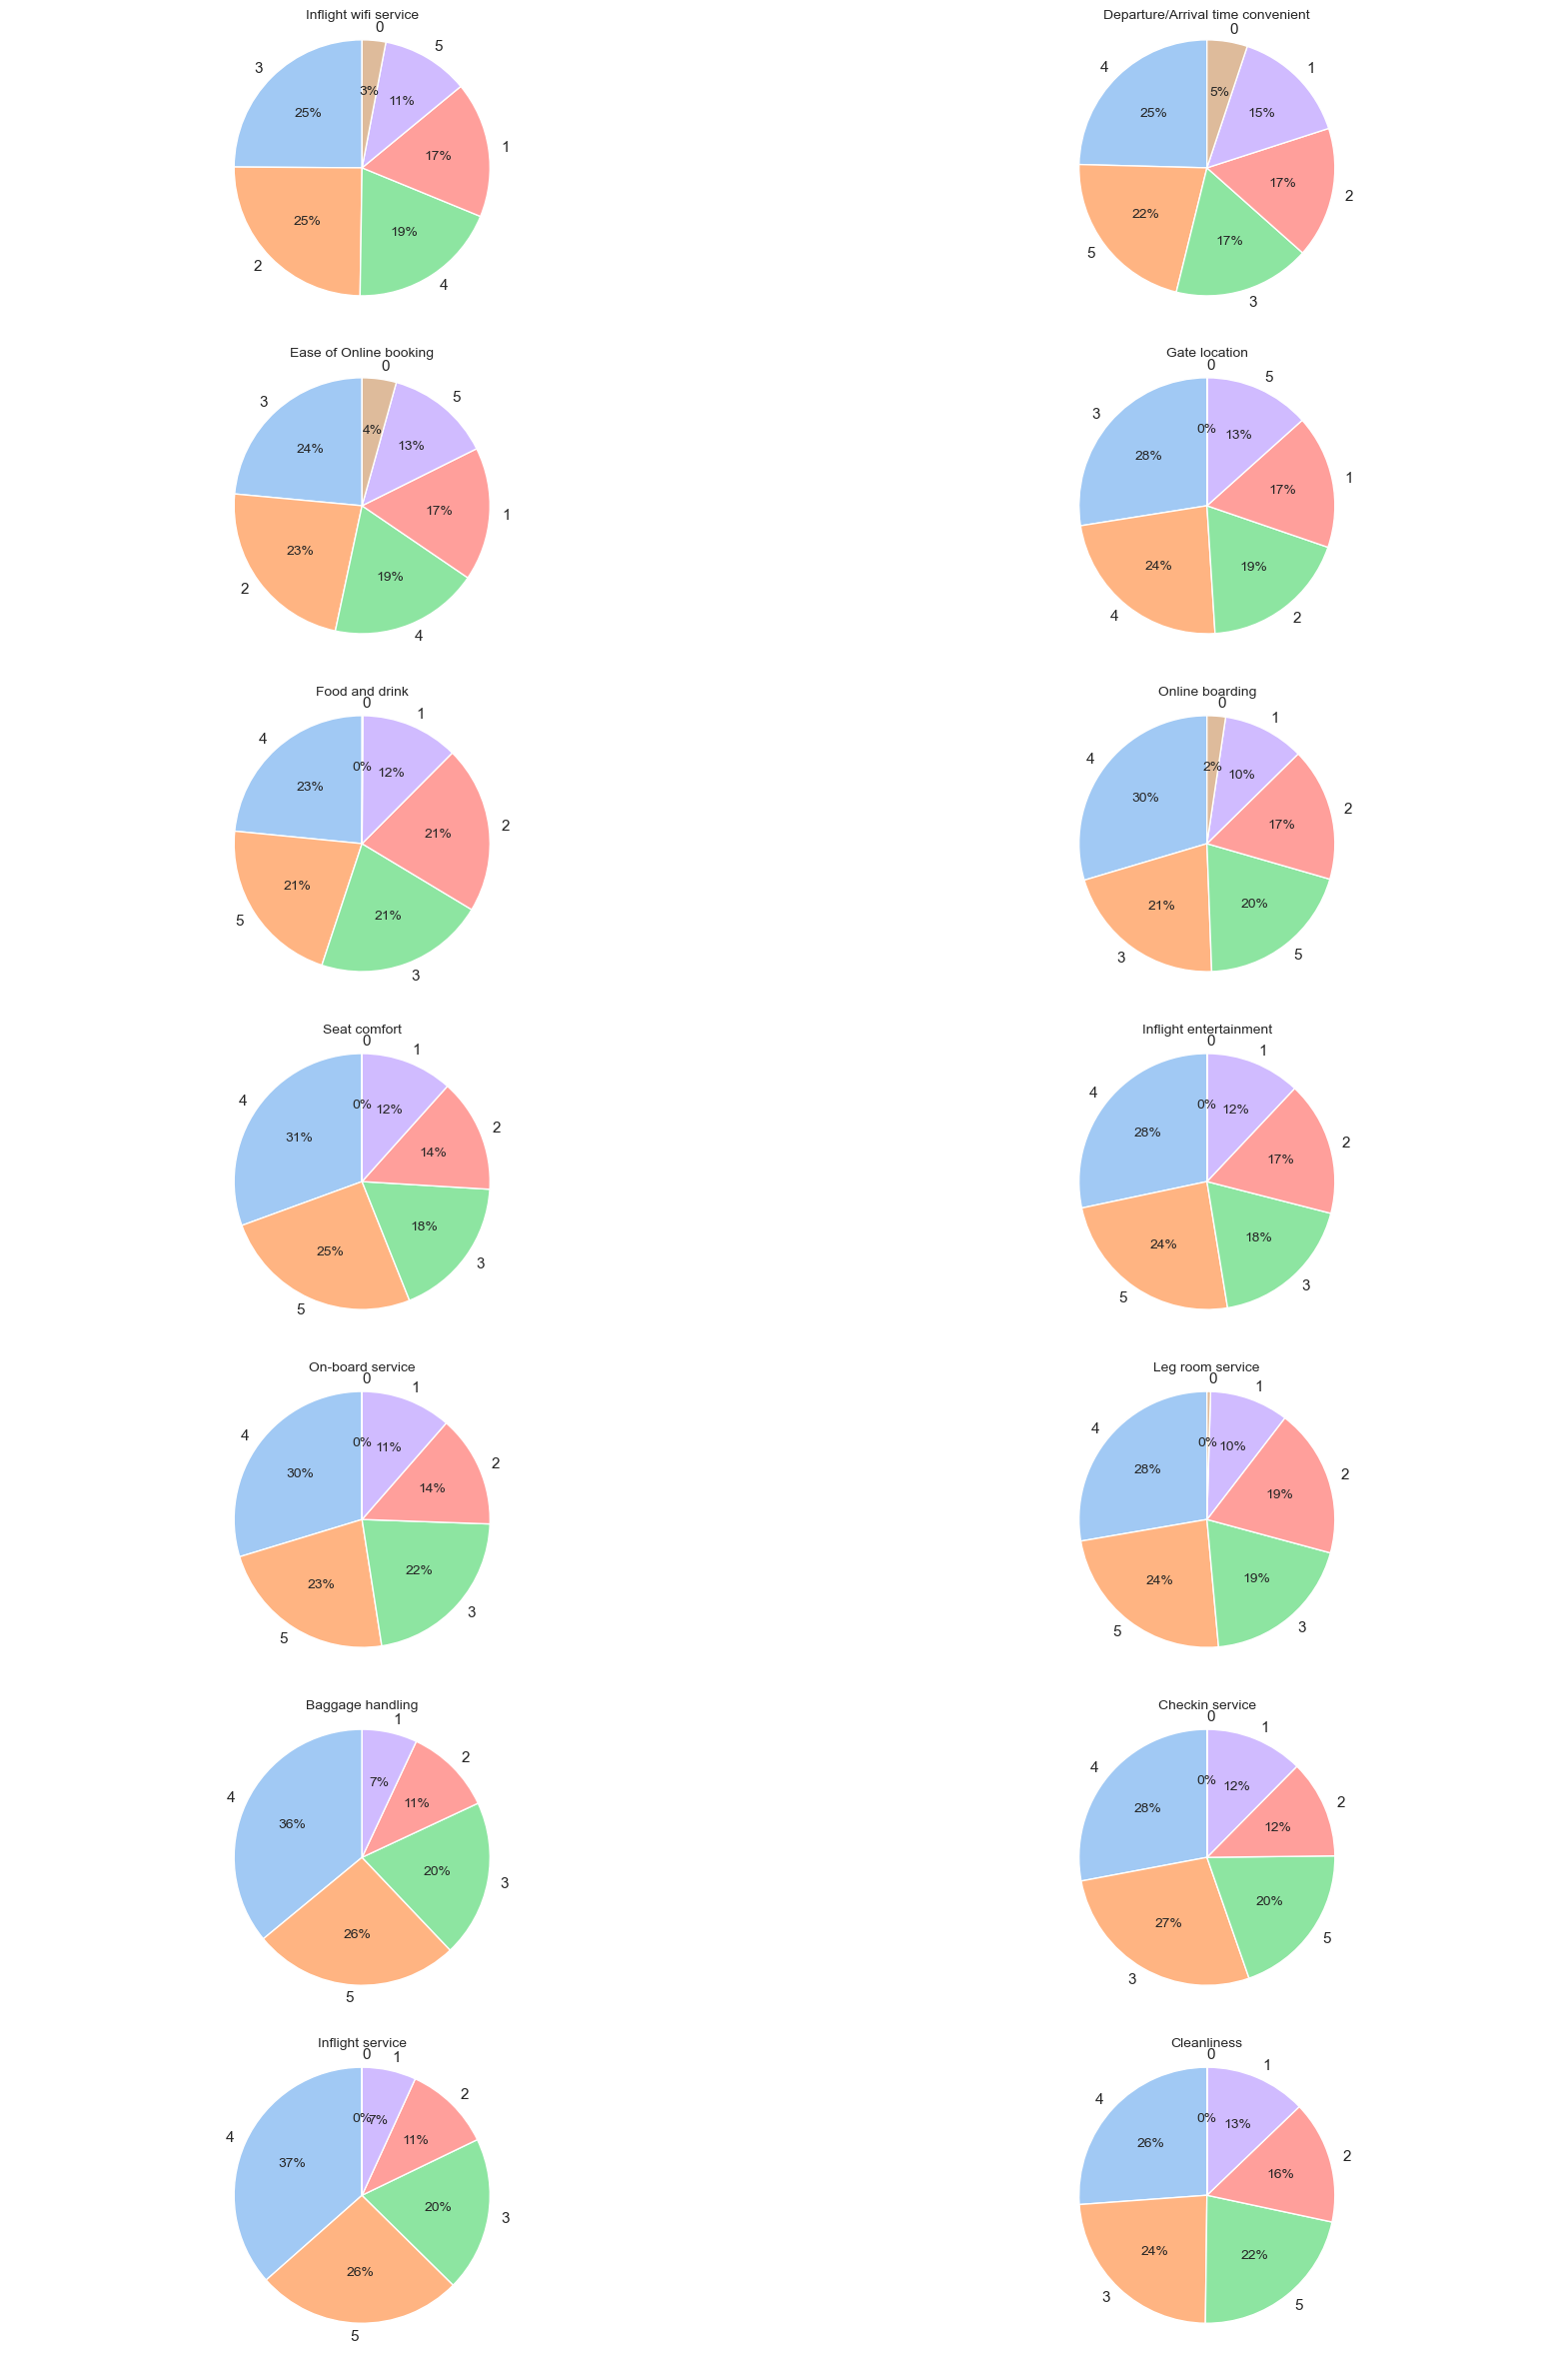

In [72]:
#displaying non continuos values in pie
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
fig, axes = plt.subplots(7, 2, figsize = (20, 30))
for i, col in enumerate(non_continues):
    column_values = df1[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//2, i%2].pie(sizes,labels = labels, colors = sns.color_palette("pastel"),autopct = '%1.0f%%', startangle = 90)
    axes[i//2, i%2].axis('equal')
    axes[i//2, i%2].set_title(col)
plt.show()

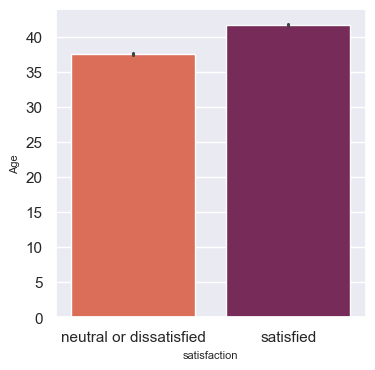

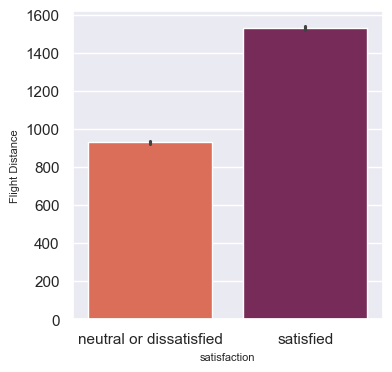

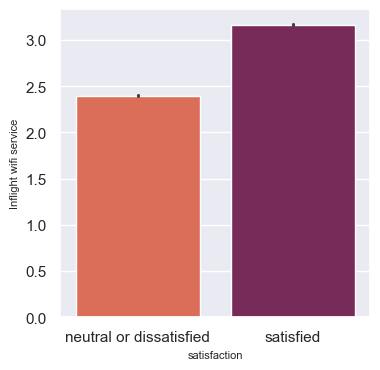

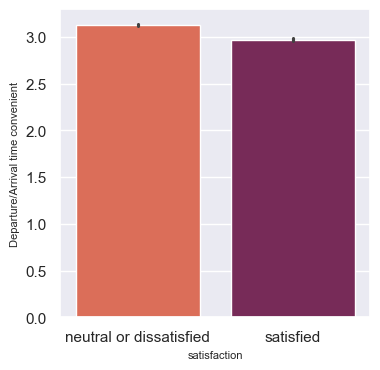

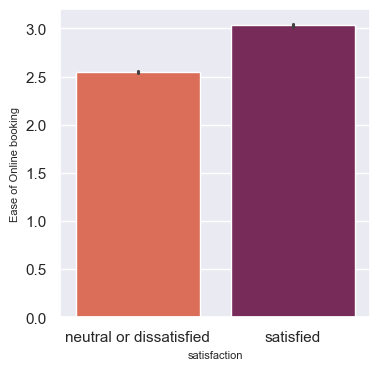

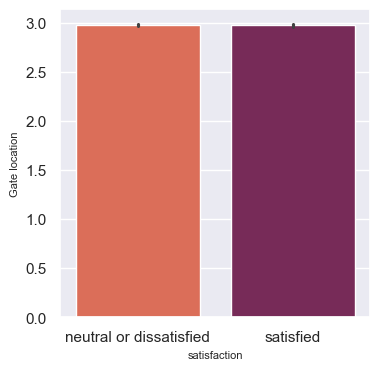

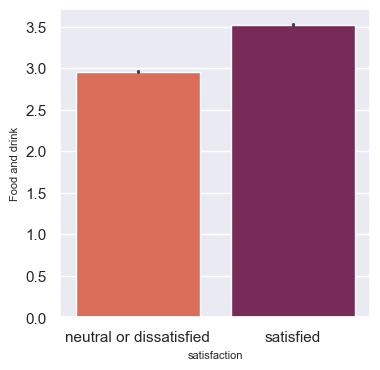

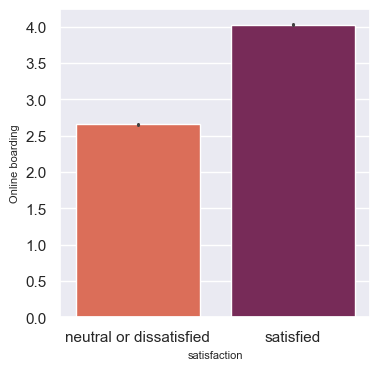

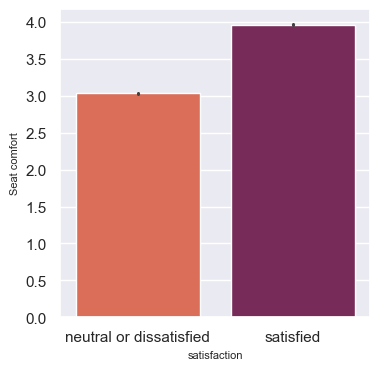

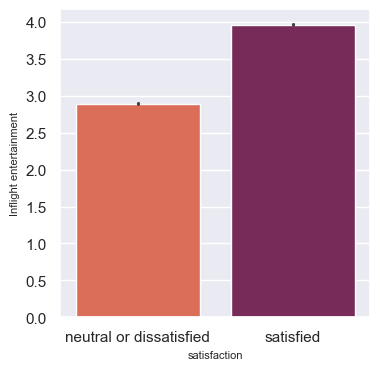

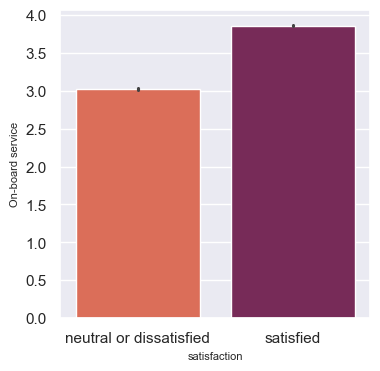

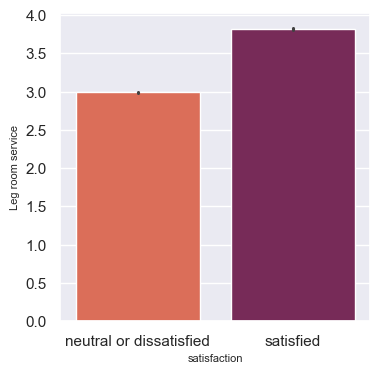

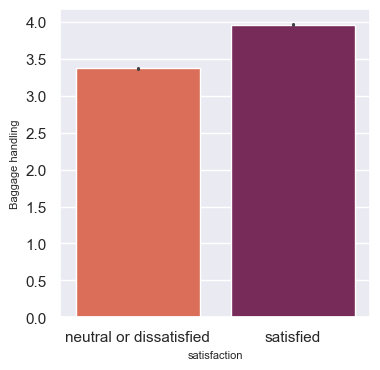

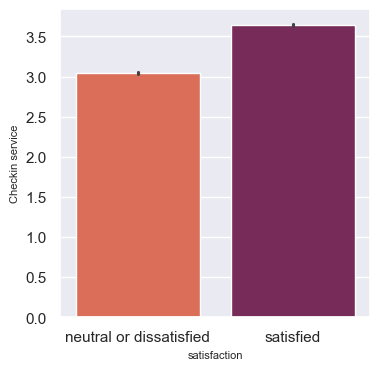

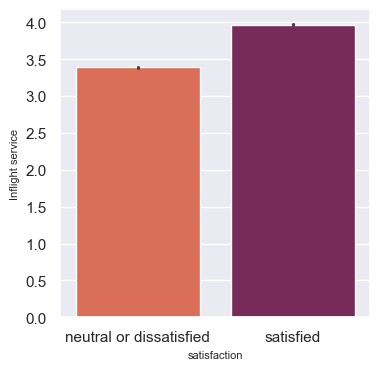

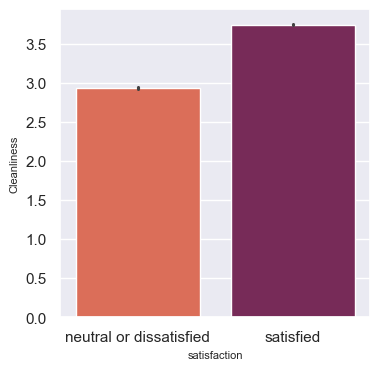

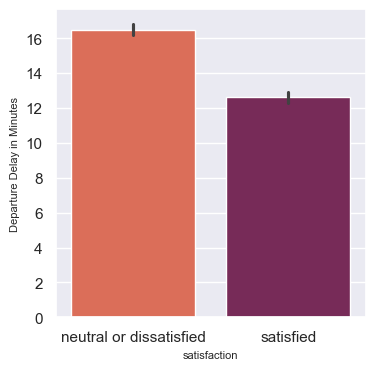

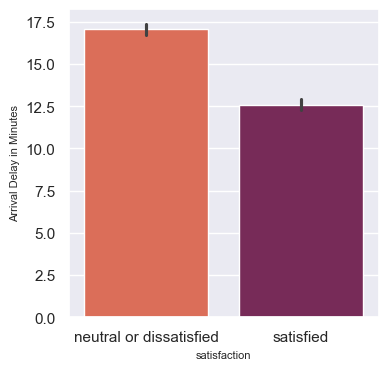

In [86]:
#plotting the barplot for numerical values
sns.set(rc={'figure.figsize':(4, 4),
            "font.size":8,
            "axes.titlesize":8,
            "axes.labelsize":8},
             style="darkgrid")
for i in numerical:
    sns.barplot(data=df1, x='satisfaction', y=i, palette='rocket_r')
    plt.show()

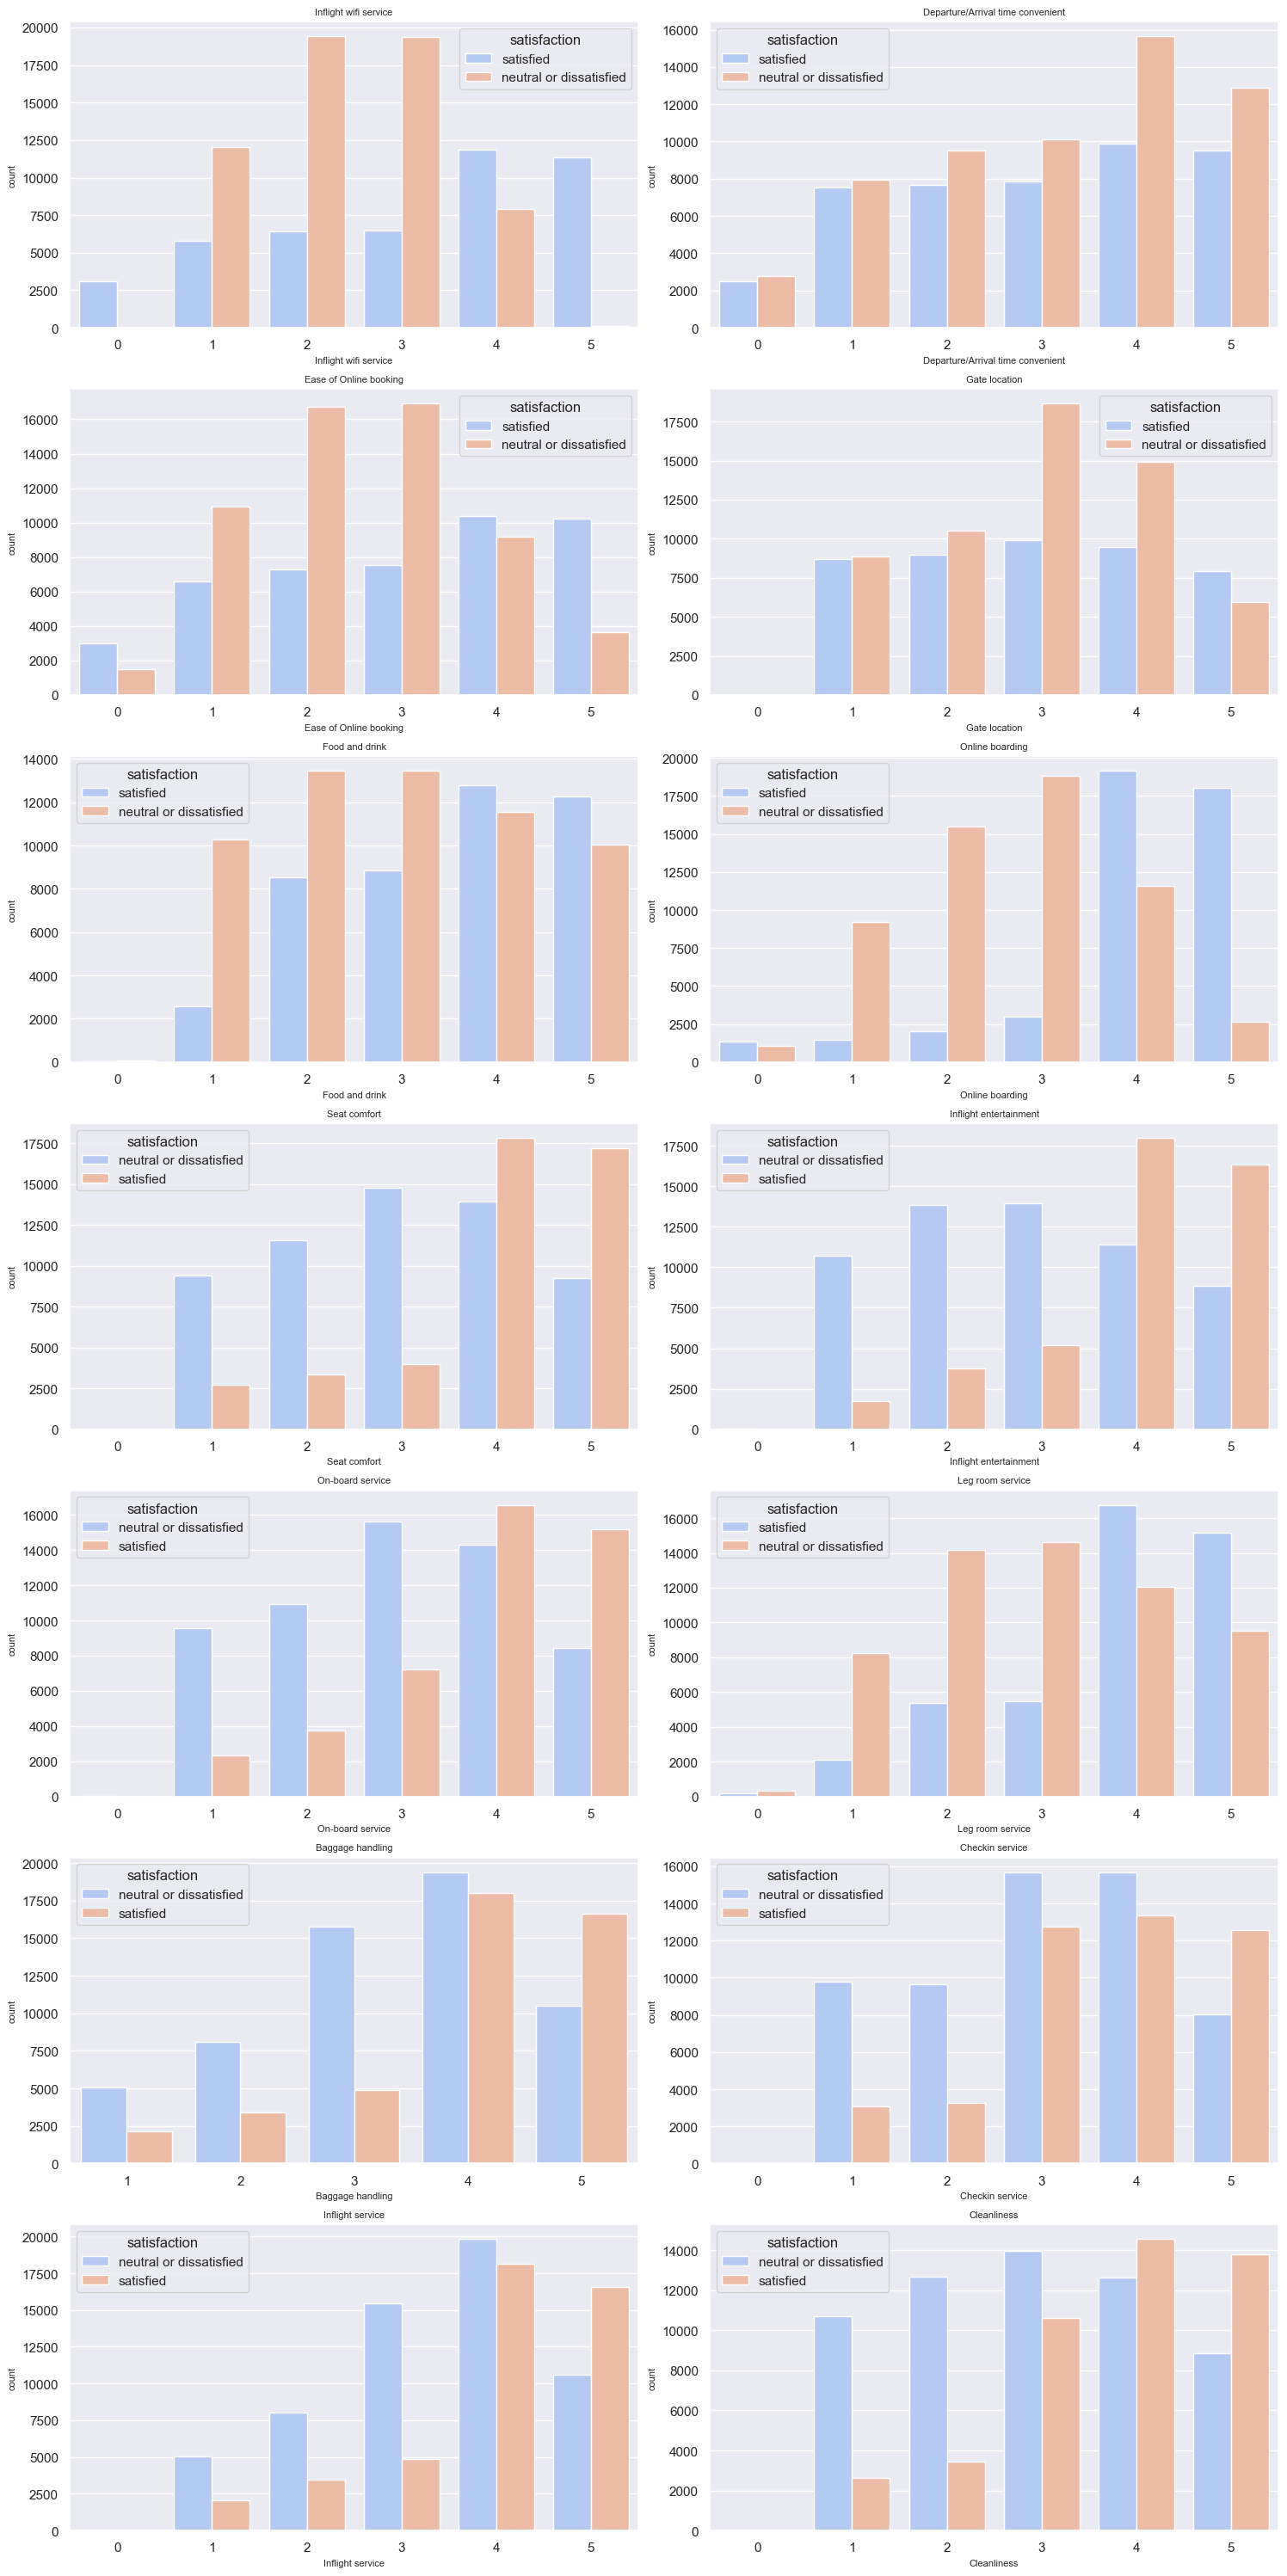

In [94]:
plt.figure(figsize=(15,30))
for i in range(len(non_continues)):
    plt.subplot(7,2,i+1)
    plt.title(non_continues[i])
    sns.countplot(x=df1[non_continues[i]],hue=df1['satisfaction'], palette = 'coolwarm')    
plt.tight_layout()

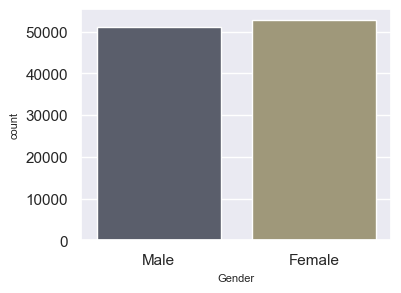

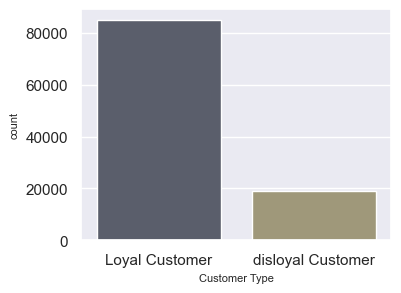

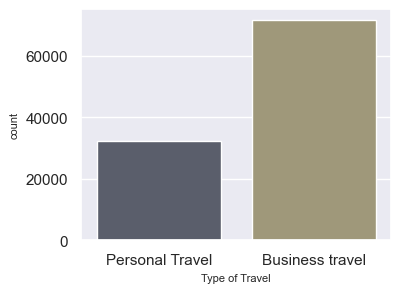

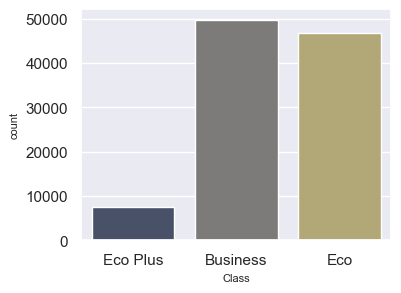

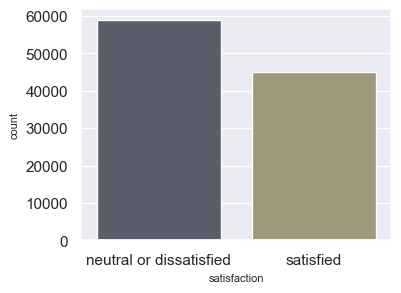

In [96]:
#using the countplot for the categorical columns
for col in categorical:
    plt.figure(figsize = (4, 3))
    sns.countplot(x = col, data = df1, palette = "cividis")
    plt.show();

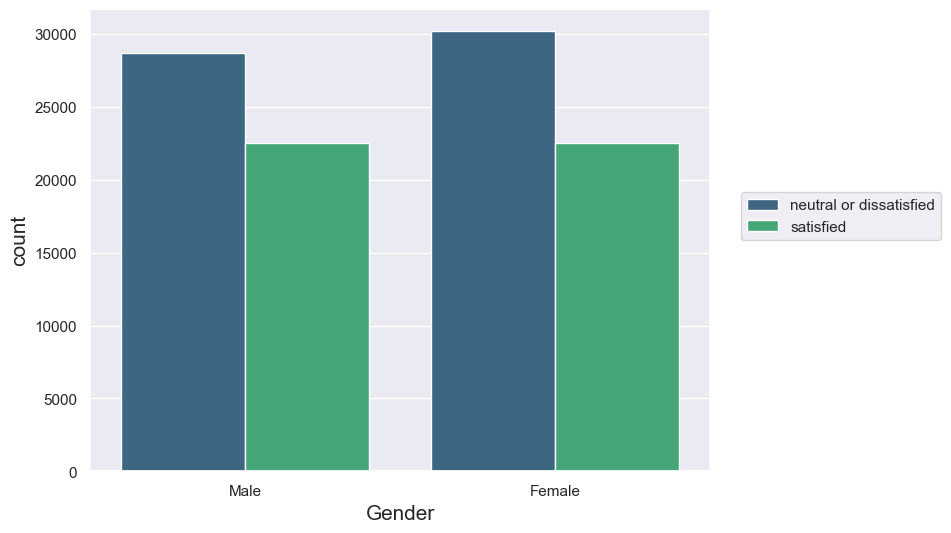

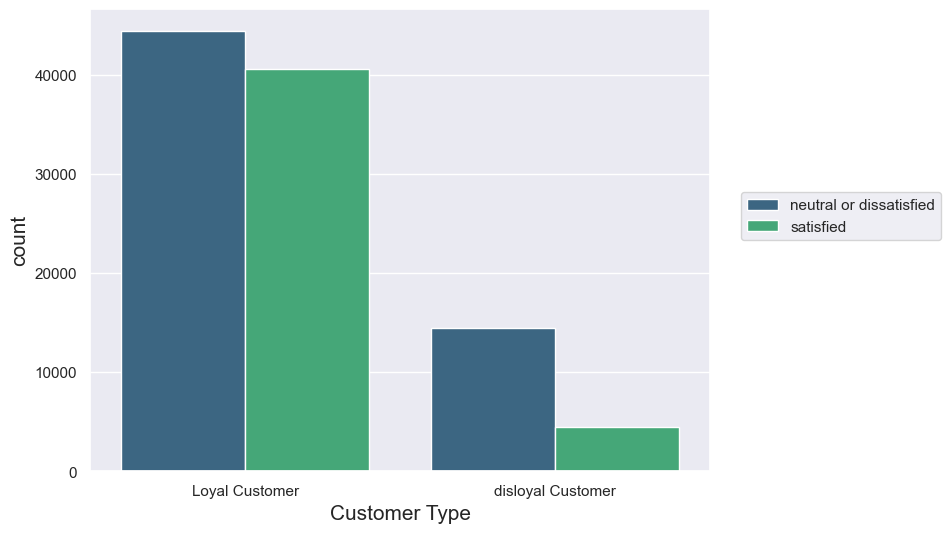

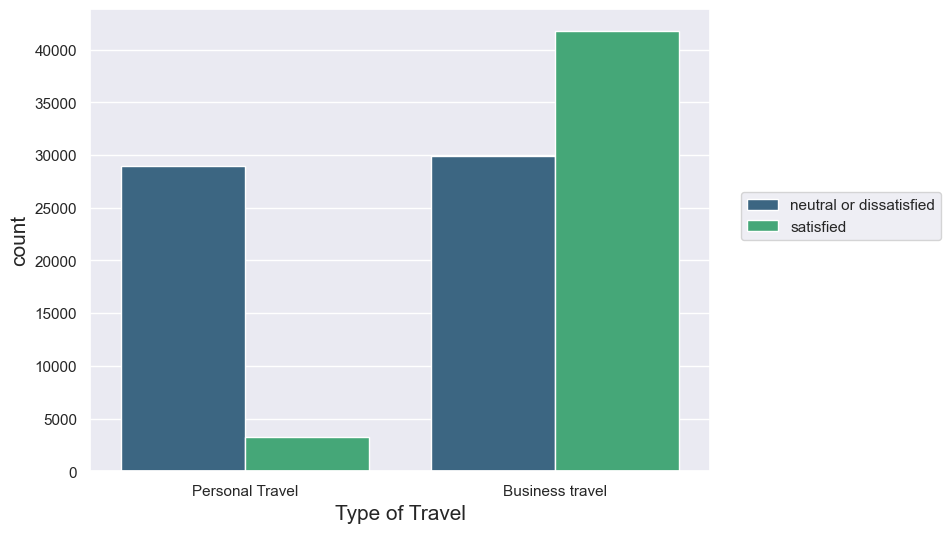

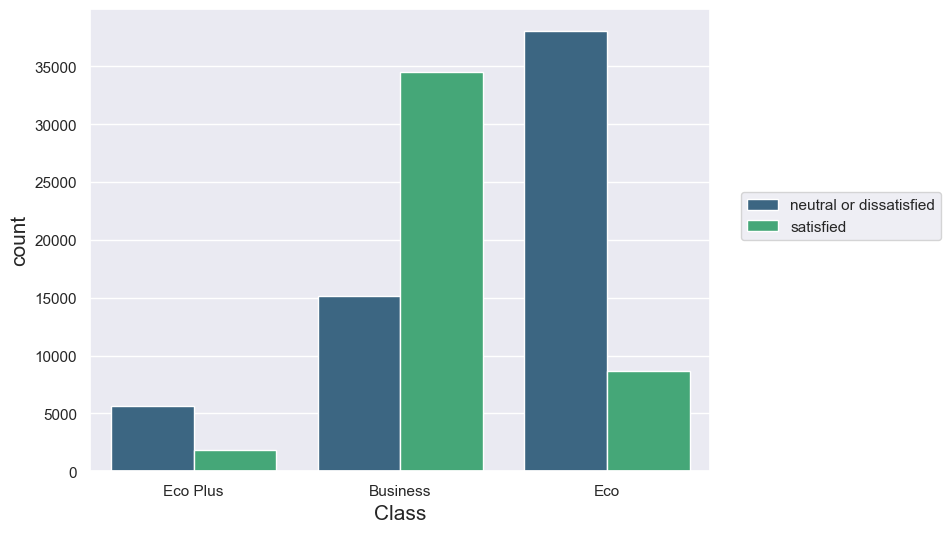

In [98]:
sns.set(rc={'figure.figsize':(8, 8),
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )

for col in categorical[:-1]:
    plt.figure(figsize=(8, 6)) 
    sns.countplot(data=df1, x=col, hue ='satisfaction', palette='viridis')
    plt.legend(loc=(1.05, 0.5))

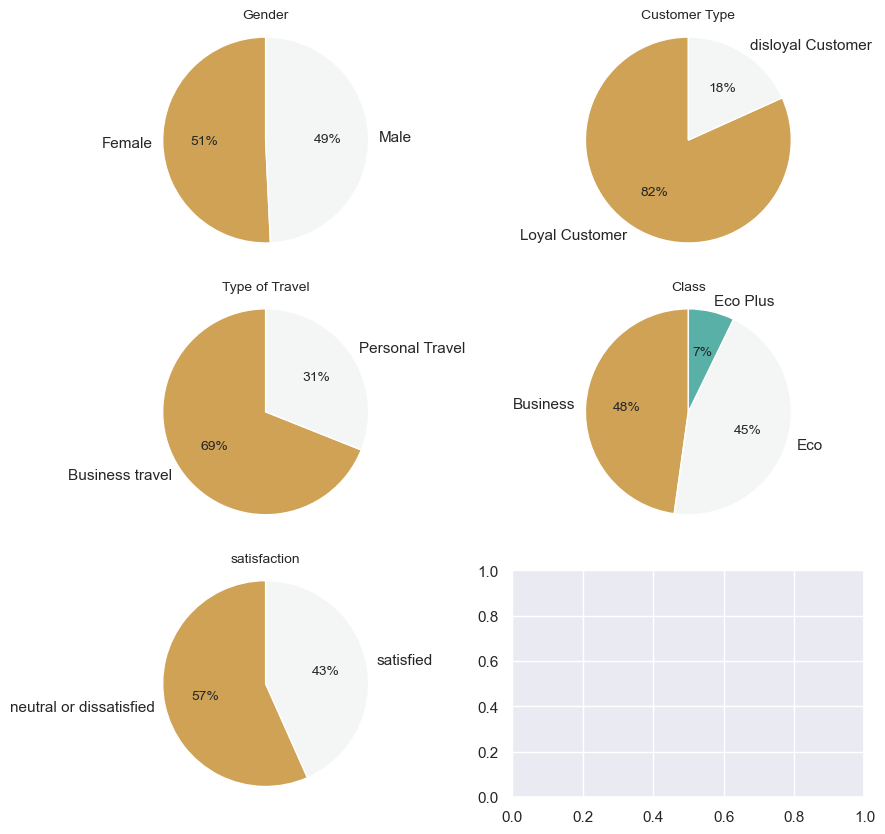

In [100]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
fig, axes = plt.subplots(3, 2, figsize = (10, 10))
for i, col in enumerate(categorical):
    column_values = df1[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//2, i%2].pie(sizes,labels = labels, colors = sns.color_palette("BrBG", 3),autopct = '%1.0f%%', startangle = 90)
    axes[i//2, i%2].axis('equal')
    axes[i//2, i%2].set_title(col)
plt.show()

## EDA Question

1. What is the level of airline passenger satisfaction based on Departure Delay and Arrival Delay?
2. What is the level of airline passenger satisfaction when viewed based on Flight Distance and Departure Delay?
3. What is the demographics of airline passengers in terms of age and type of trips taken by passengers?
4. What is the demographics of airline passengers when viewed based on age and class used by passengers when using the airline?
5. What is the level of airline passenger satisfaction when viewed based on Flight Distance?nce?

### 1. Departure Delay & Arrival Delay:

In [89]:
#level of satisfaction based on arrival and departure delay
df1.groupby('satisfaction')['Departure Delay in Minutes'].mean()

satisfaction
neutral or dissatisfied    16.503728
satisfied                  12.608084
Name: Departure Delay in Minutes, dtype: float64

In [91]:
df1.groupby('satisfaction')['Arrival Delay in Minutes'].mean()

satisfaction
neutral or dissatisfied    17.074594
satisfied                  12.594892
Name: Arrival Delay in Minutes, dtype: float64

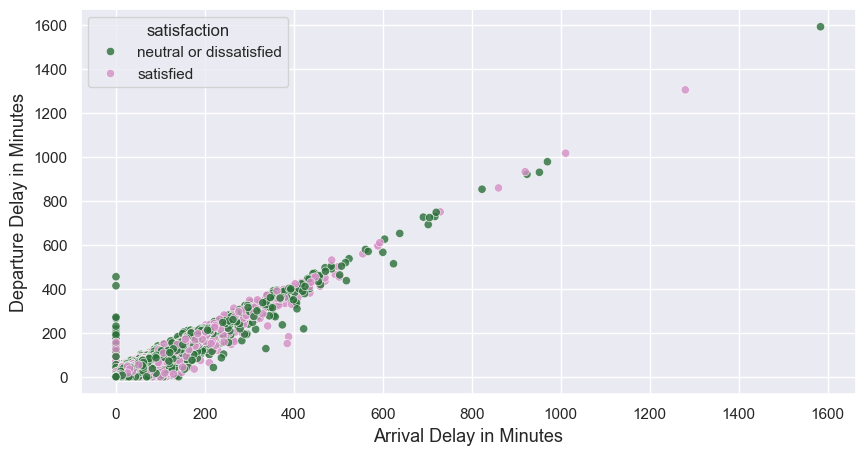

In [95]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
plt.figure(figsize=(10, 5), dpi=100)
sns.scatterplot(data=df1, x='Arrival Delay in Minutes', y='Departure Delay in Minutes', hue='satisfaction', palette='cubehelix', alpha=0.8);

### 2.  Flight Distance & Departure Delay:

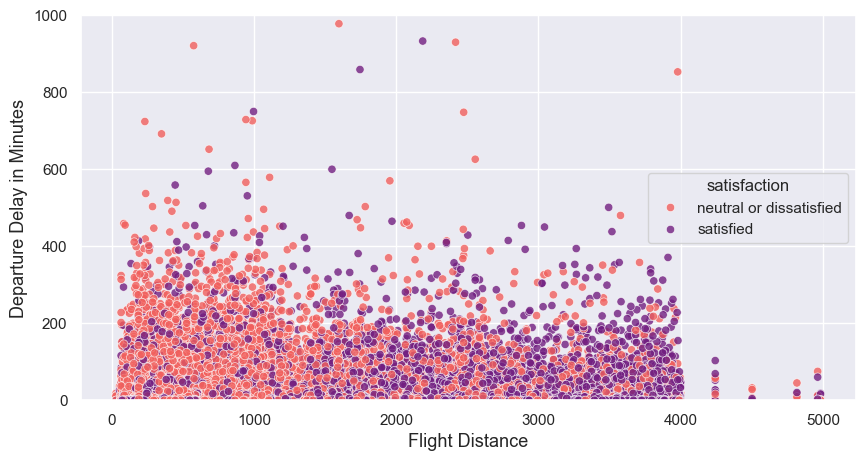

In [99]:
#satisfaction level based on departure delay and flight distance
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=df1, x='Flight Distance', y='Departure Delay in Minutes', hue='satisfaction', palette='magma_r', alpha=0.8)
plt.ylim(0,1000);

### 3. Age & Customer Type:

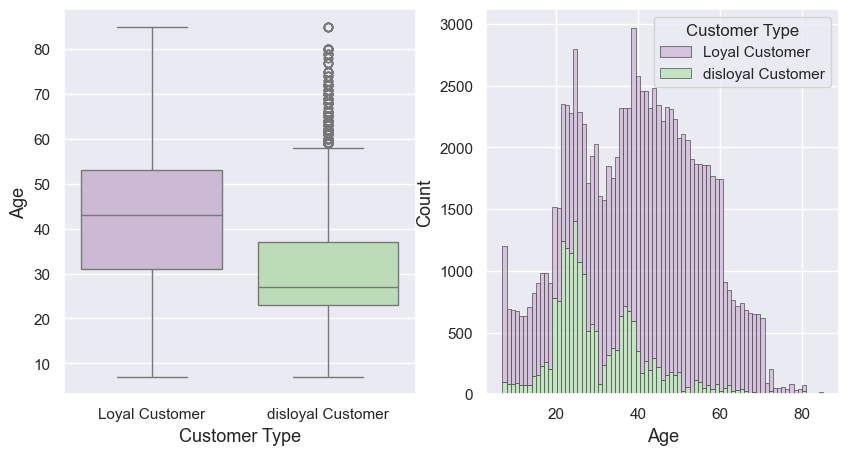

In [118]:
#demographic of passengers based on age and customer type
f, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(x = "Customer Type", y = "Age", palette = "PRGn", data = df, ax = ax[0])
sns.histplot(df1, x = "Age", hue = "Customer Type", multiple = "stack", palette = "PRGn", edgecolor = ".3", 
             linewidth = .5, ax = ax[1]);

### 4. Age & Class:

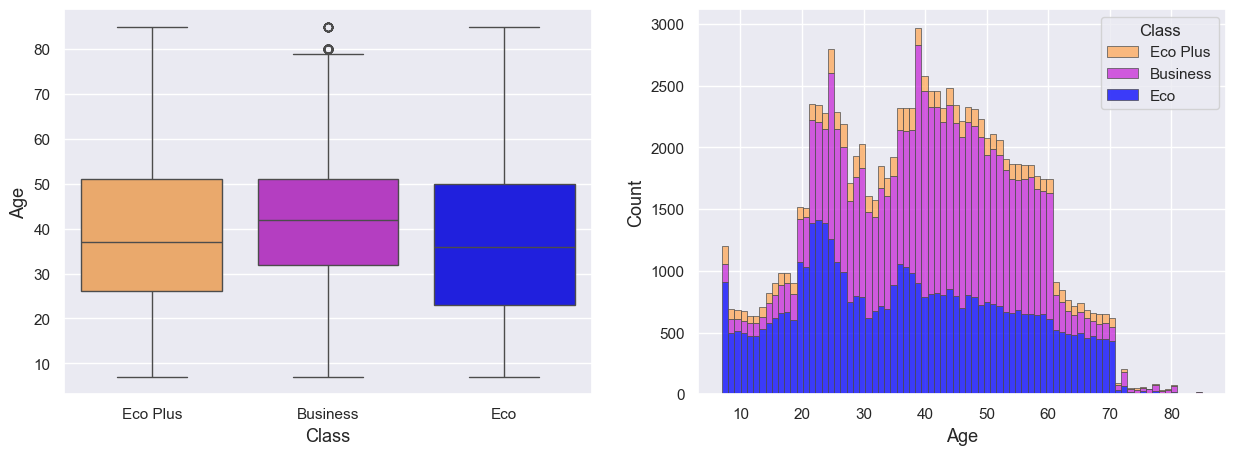

In [120]:
#demographic based on age and class
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.boxplot(x = "Class", y = "Age", palette = "gnuplot2_r", data = df1, ax = ax[0])
sns.histplot(df1, x = "Age", hue = "Class", multiple = "stack", palette = "gnuplot2_r", edgecolor = ".3", 
             linewidth = .5, ax = ax[1]);

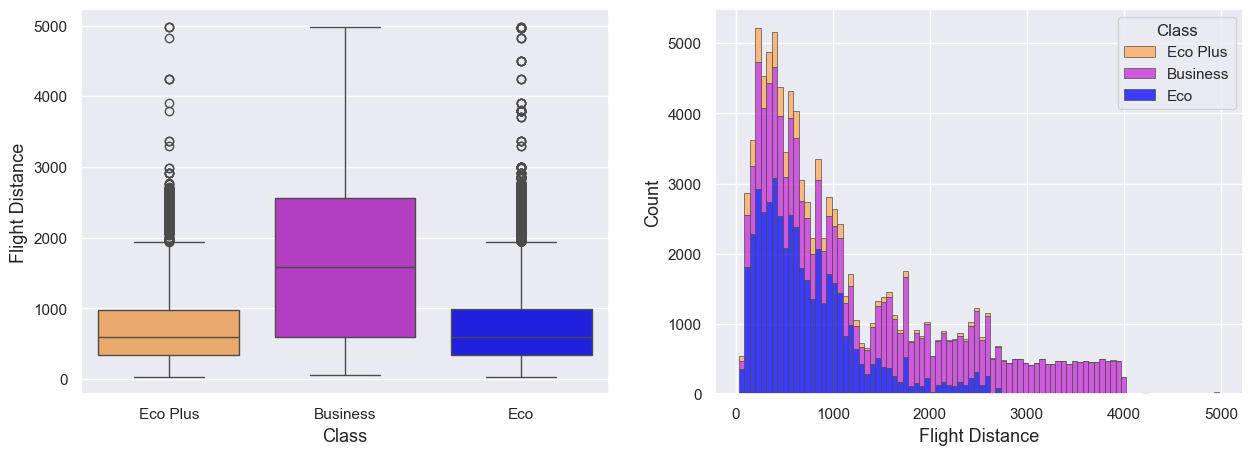

In [104]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Flight Distance", palette = "gnuplot2_r", data = df1, ax = ax[0])
sns.histplot(df1, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "gnuplot2_r", edgecolor = ".3", 
             linewidth = .5, ax = ax[1]);

### 5. Flight Distance

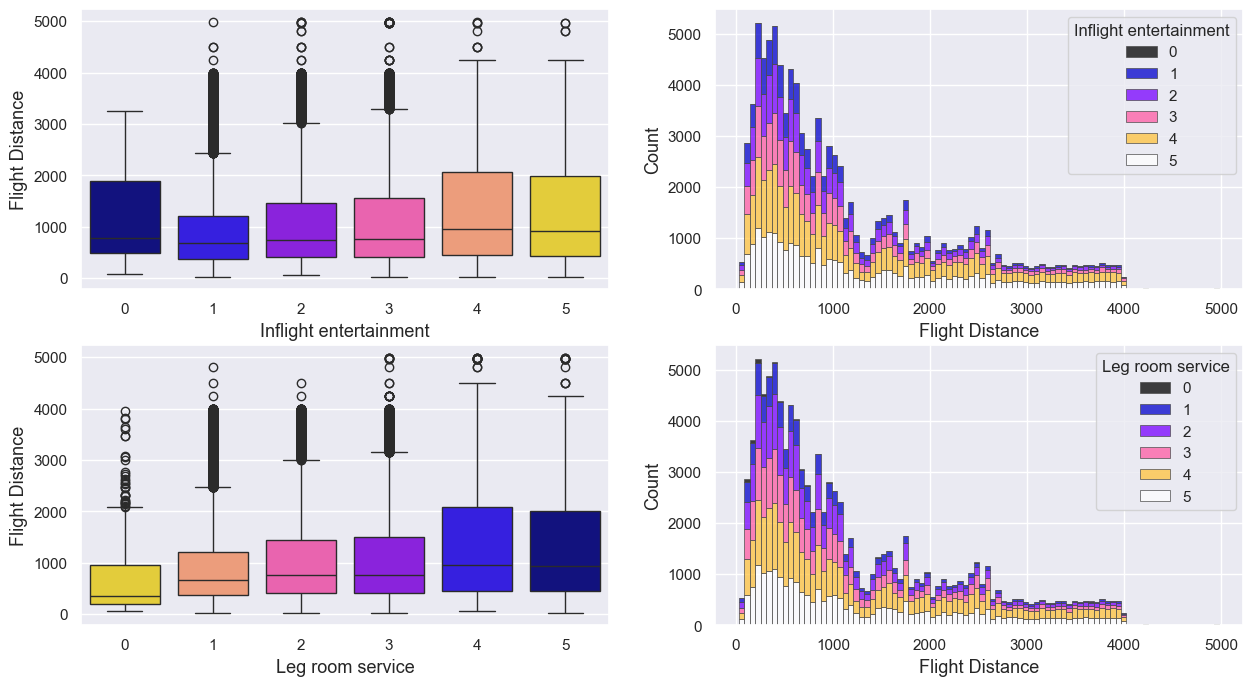

In [124]:
#level of satisfaction based on just the flight distance
f, ax = plt.subplots(2, 2, figsize = (15, 8))
sns.boxplot(x = "Inflight entertainment", y = "Flight Distance", palette = "gnuplot2", data = df1, ax = ax[0, 0])
sns.histplot(df1, x = "Flight Distance", hue = "Inflight entertainment", multiple = "stack", palette = "gnuplot2", 
             edgecolor = ".3", linewidth = .5, ax = ax[0, 1])
sns.boxplot(x = "Leg room service", y = "Flight Distance", palette = "gnuplot2_r", data = df1, ax = ax[1, 0])
sns.histplot(df1, x = "Flight Distance", hue = "Leg room service", multiple = "stack", palette = "gnuplot2", 
             edgecolor = ".3", linewidth = .5, ax = ax[1, 1]);

## Multivariate Analysis

### Using Pearson's Correlation for Drawing Heatmap:

### Correlation Heatmap for Numeric Column

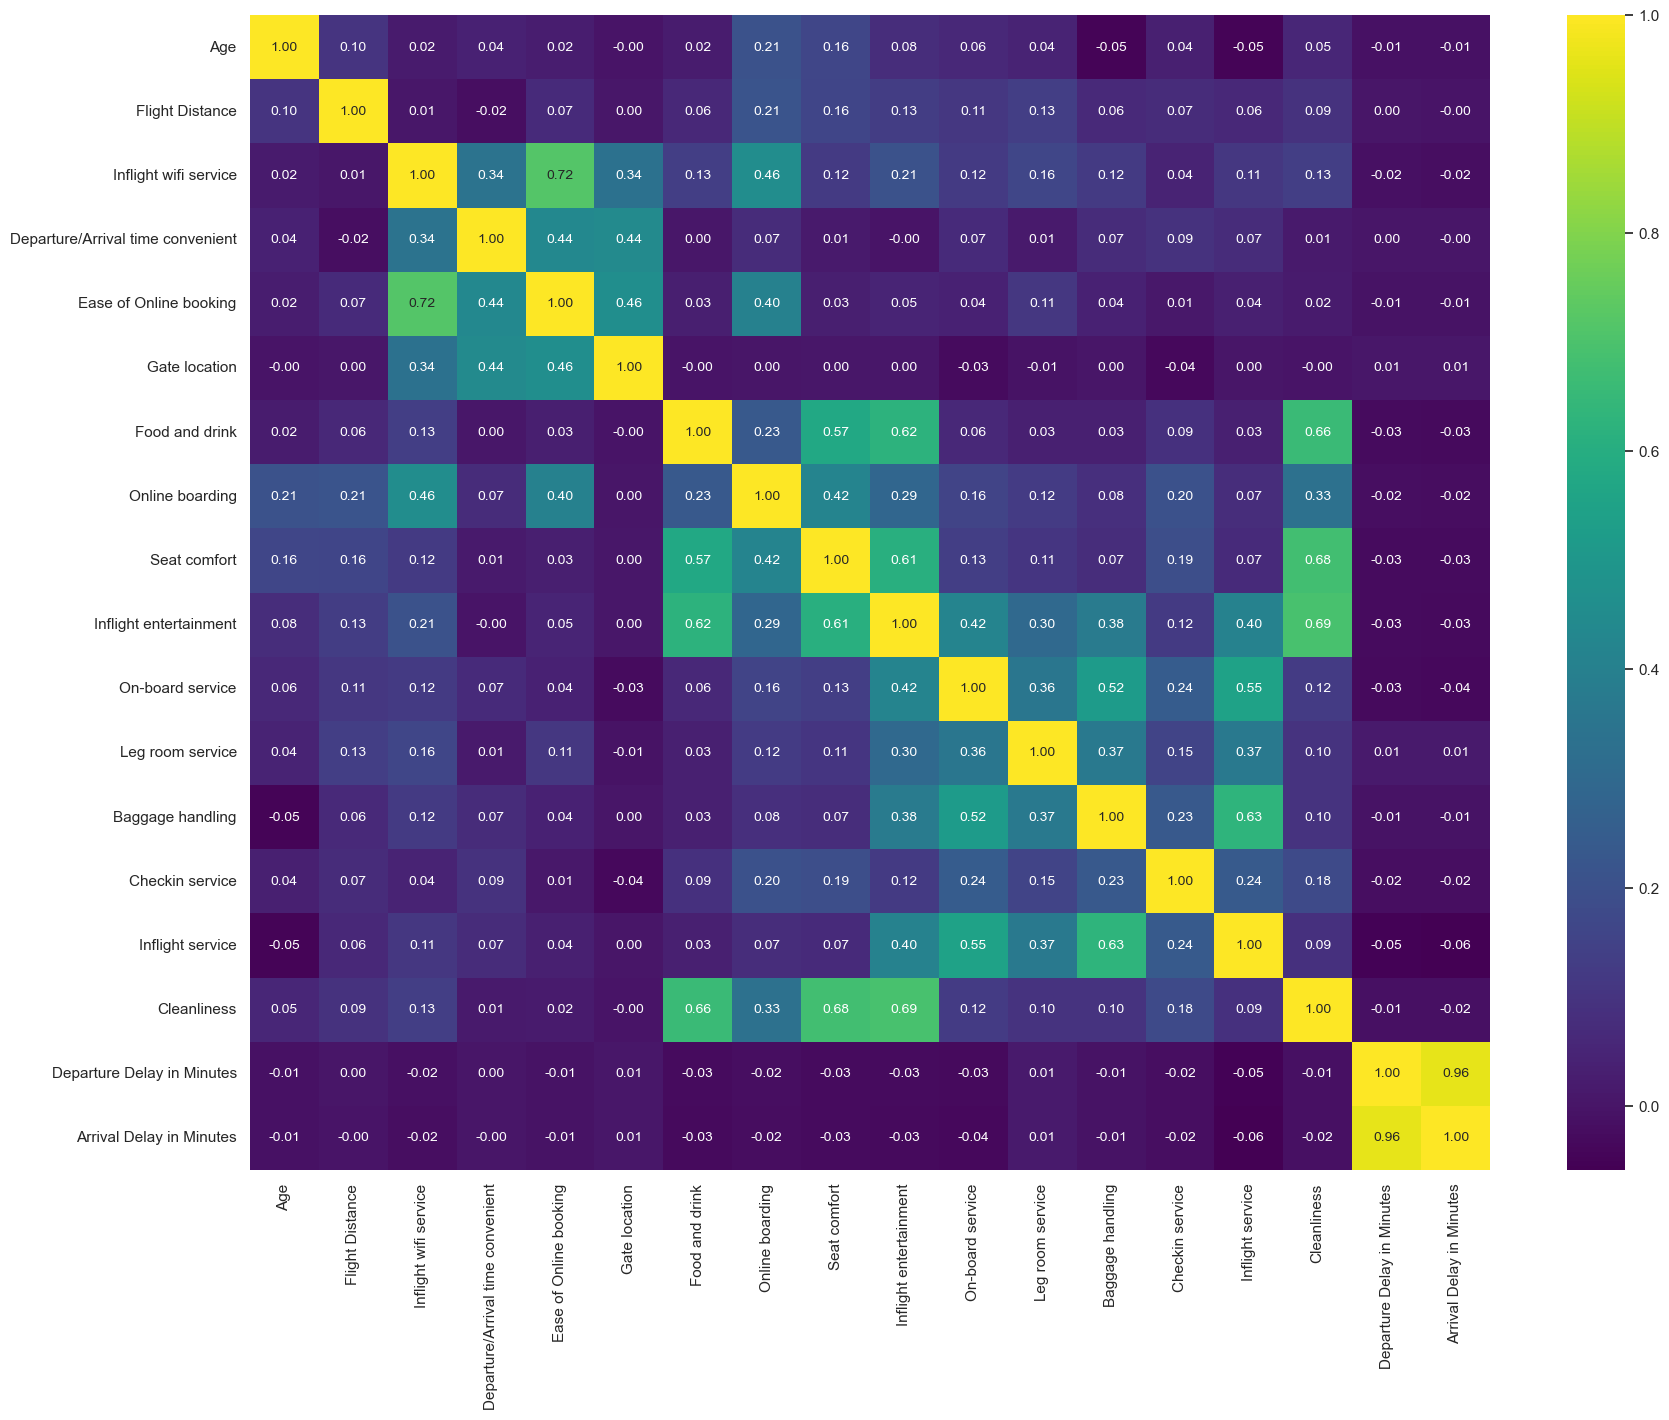

In [113]:
correlation = df1.corr(numeric_only=True)
plt.figure(figsize = (20, 15))
sns.heatmap(correlation, annot = True, fmt = '.2f', cmap = 'viridis');

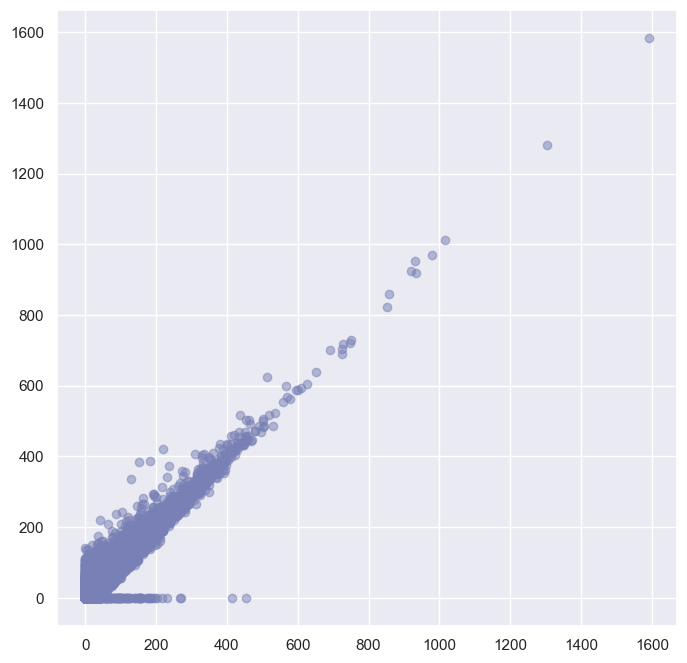

In [117]:
plt.scatter(df1['Departure Delay in Minutes'], df['Arrival Delay in Minutes'], alpha = 0.5, color = '#7880b5')
pass;

### Dependent Variable or Feature:

In [141]:
df1["satisfaction"].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

### Check Dependent Variable is Balanced or Not:

In [143]:
round(df1["satisfaction"].value_counts()[1]/(df1["satisfaction"].value_counts()[0]+df1["satisfaction"].value_counts()[1])*100,2)

43.33

In [155]:
target = df1['satisfaction'].value_counts().reset_index()
target.rename(columns={'index':'satisfaction','satisfaction':'freq'}, inplace=True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,2)
target

TypeError: unsupported operand type(s) for /: 'str' and 'str'

### EDA on Feature Satisfaction:

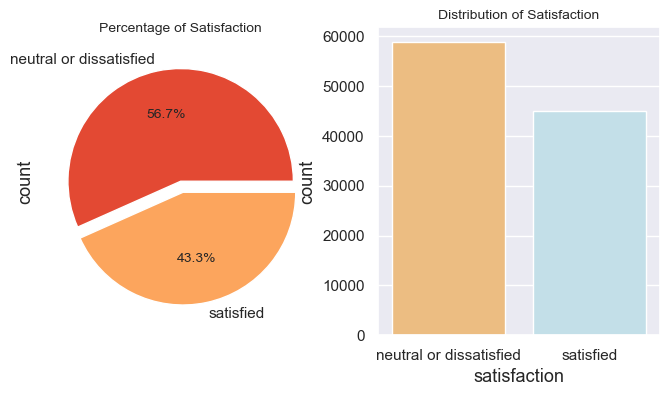

In [158]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))
df1['satisfaction'].value_counts().plot.pie(explode=[0,0.1],colors = sns.color_palette("RdYlBu"),autopct='%1.1f%%',ax=ax1)
ax1.set_title('Percentage of Satisfaction')
sns.countplot(x='satisfaction',data=df,ax=ax2,palette='RdYlBu')
ax2.set_title('Distribution of Satisfaction')
plt.show();

## Data Preprocessing and Feature Engineering:

### Handling Categorical Column (Encoding)

In [162]:
def categoricals_unique(data):
    for column in data:
        if data[column].dtypes == 'object':
            print(f'{column} : {data[column].unique()}')

In [164]:
categoricals_unique(df1)

Gender : ['Male' 'Female']
Customer Type : ['Loyal Customer' 'disloyal Customer']
Type of Travel : ['Personal Travel' 'Business travel']
Class : ['Eco Plus' 'Business' 'Eco']
satisfaction : ['neutral or dissatisfied' 'satisfied']


In [166]:
for i in df1.columns:
    if df1[i].dtype=='object':
            label_encoder=preprocessing.LabelEncoder()
            df1[i]=label_encoder.fit_transform(df1[i])

In [168]:
df1['Class'].unique()

array([2, 0, 1])

In [170]:
df1.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


In [172]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int32  
 1   Customer Type                      103904 non-null  int32  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int32  
 4   Class                              103904 non-null  int32  
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

### Split Data: Training-Testing

In [175]:
feature = df1.drop(columns = 'satisfaction')
target = df1[['satisfaction']]

feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size = 0.20, random_state = 42)

In [177]:
feature_train.shape

(83123, 22)

## 1. LGBMClasifier

In [183]:
import lightgbm as lgb

## 2. DecisionTreeClassifier

In [221]:
# Create the DecisionTreeClassifier model
decision_tree = DecisionTreeClassifier()

# Train the model on the training data
decision_tree.fit(feature_train, target_train)

DecisionTreeClassifier()

### Model Prediction

In [224]:
target_pred = decision_tree.predict(feature_test)

### Accuracy of the Model:

In [231]:
accuracy = accuracy_score(target_pred, target_test)
print('Decision Tree Model accuracy score: {0:0.4f}'.format(accuracy))

Decision Tree Model accuracy score: 0.9481


### Compare accuracy between training and test sets

In [235]:
traget_pred_train = decision_tree.predict(feature_train)
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(target_train, target_pred_train)))

Training-set accuracy score: 0.9669


### Check Overfitting

In [238]:
print('Training set score: {:.4f}'.format(decision_tree.score(feature_train, target_train)))
print('Test set score: {:.4f}'.format(decision_tree.score(feature_test, target_test)))

Training set score: 1.0000
Test set score: 0.9481


### Confusion Matrix:

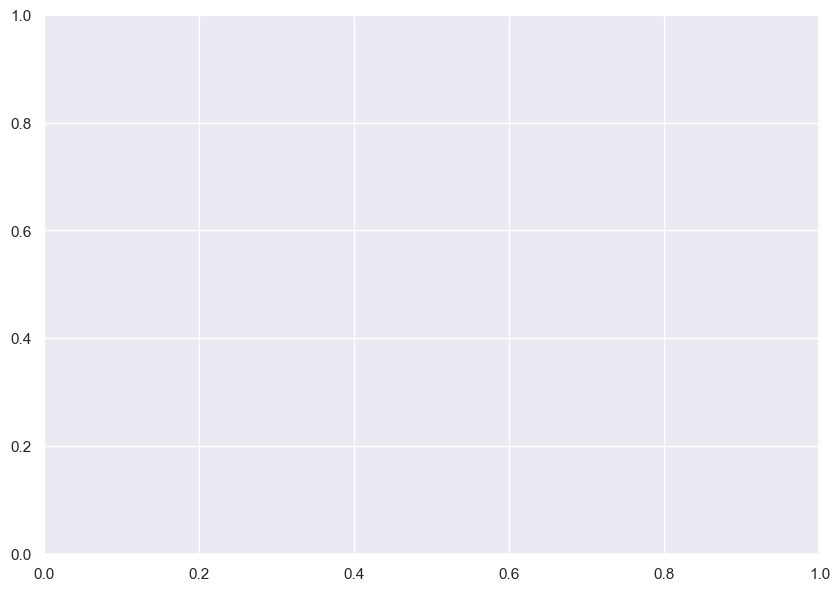

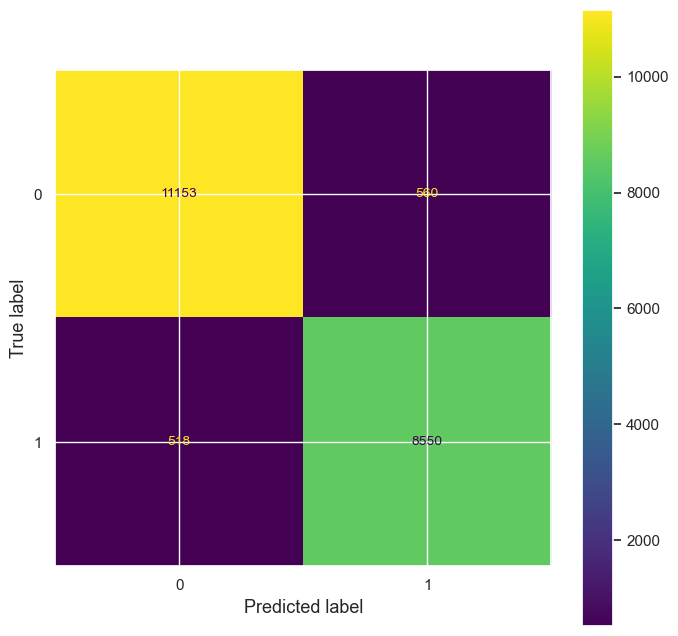

In [243]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))

cm = confusion_matrix(target_test, target_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(target_test))  # Include class labels for better interpretation
disp.plot()
plt.show()

### Classification Metrics:

In [246]:
from sklearn.metrics import classification_report
print(classification_report(target_test, target_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     11713
           1       0.94      0.94      0.94      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781

